In [1]:
# 工作流（0,1）字符串的处理
# 1 使用str预定义的函数
# 2 直接拼接
# 3 使用apply函数
# 更多信息见视频 6:18  链接：https://www.bilibili.com/video/BV1rt4y1W769/?spm_id_from=333.1007.top_right_bar_window_history.content.click&vd_source=110dbb9521e220794463f24d6a8b3971

In [2]:
# 导入库
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# 使用泰坦尼克乘客数据表格 通过csv文件传入
titanic = pd.read_csv('titanic.csv')

In [4]:
# 使用str预定义的函数
print(titanic['Name'].str.lower()[:3]) #转为小写 #[:3] 这只是为了取前三个看看效果，不属于文本操作本身
print(titanic['Name'].str.upper()[:3]) #转为大写
print(titanic['Name'].str.len()[:3]) #计算长度
print(titanic['Name'].str.strip().str.lower().str.replace(" ","_")[:3])
#.str.strip()：去皮（删去名字前后多余的空格，常用的清理数据手段） .str.replace(" ", "_")：替换（查找名字中的所有空格并换为下划线）
# 1. 报错修复：链式调用必须步步加 .str（即 .str.strip().str.lower()），因为 Series 容器本身没有 lower 属性。
# 2. 逻辑修正：replace 第一个参数应为含空格的 " "，写成空字符串 "" 会导致在每个字符间隙插入下划线。
# 核心关键词：.str。只要你想处理表格里的文字，就必须先加上它

0                              braund, mr. owen harris
1    cumings, mrs. john bradley (florence briggs th...
2                               heikkinen, miss. laina
Name: Name, dtype: object
0                              BRAUND, MR. OWEN HARRIS
1    CUMINGS, MRS. JOHN BRADLEY (FLORENCE BRIGGS TH...
2                               HEIKKINEN, MISS. LAINA
Name: Name, dtype: object
0    23
1    51
2    22
Name: Name, dtype: int64
0                              braund,_mr._owen_harris
1    cumings,_mrs._john_bradley_(florence_briggs_th...
2                               heikkinen,_miss._laina
Name: Name, dtype: object


In [5]:
#使用.split()分隔符分割字符串 再使用str[]拾取
titanic['lastName']=titanic['Name'].str.split(',').str[0]
# 具体实现：切之前："Braund, Mr. Owen Harris" 切之后：["Braund", " Mr. Owen Harris"] .str[0]取走前面列表的第0个位置（第一个元素）
# titanic['Name'].str.split(',').str.get(0)[:5] "str[0]"是"str.get(0)[:5]"的简写
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastName
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen


In [6]:
# 字符串直接拼接
titanic['Name'] = titanic['Name'].astype("string") #它的具体作用是将 Name 这一列的数据类型（dtype），从默认的通用对象类型（object），强制转换为 Pandas 专用的文本类型（string）
titanic['nameSex'] = titanic['lastName'] + "_" + titanic['Sex']
# 原因：Jupyter 内存有记忆，修改代码变量名（如 namesex 改为 nameSex）重新运行后，旧列不会自动消失，导致表格里积累了多次修改的同名列。
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastName,nameSex
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Braund_male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Cumings_female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Heikkinen_female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Futrelle_female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Allen_male


In [7]:
# 生成一条信息
def my_avg(x): # x是apply传进来的每一行数据(Series)
    # 生成一条生平短信息
    # 格式："Mr./Ms. 姓, survived/dead at titanic at age ___"
    
    # 1. 取出这一行里的四个数据：性别、姓氏、存活状态、年龄
    sex, lastname, survive_status, age = x['Sex'], x['lastName'], x['Survived'], x['Age']
    
    # 2. 设置默认值（默认为男性 Mr.，默认为去世 died）
    prefix, survive_str = "Mr. ", "died"

    # 3. 如果是女性，称呼改为 Ms.
    if sex == "female":
        prefix = "Ms. "
        
    # 4. 如果存活状态是 1，改为 survived
    if survive_status == 1:
        survive_str = "survived"

    # 5. 格式化字符串，把上面准备好的变量填进去
    ret_string = "{} {}, {} at Titanic at the age of {}.".format(prefix, lastname, survive_str, age)
    
    return ret_string

# apply 核心逻辑解析：
# 1. axis=1 ：表示“横向”操作，命令 Pandas 把表格“一行一行”地单独切出来。
# 2. 传参机制 ：切出来的每一行数据（包含 Sex, Age 等所有列）会被打包赋值给函数里的参数 x。
# 3. 适用场景 ：当简单的加减运算无法满足，需要用到 if/else 等复杂逻辑时使用。

titanic['message'] = titanic.apply(my_avg, axis=1)
# 总结：三个阶段
# 生产阶段 (return)：处理好了一句一句字符串
# 收集阶段 (apply)：收集生产阶段产生的字符串（800多句）
#存档阶段 （=）：再开一列"message" 将"apply"的结果按序填进去"="

# 显示前几行看看结果
display(titanic.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,lastName,nameSex,message
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Braund_male,"Mr. Braund, died at Titanic at the age of 22.0."
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Cumings_female,"Ms. Cumings, survived at Titanic at the age o..."
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Heikkinen_female,"Ms. Heikkinen, survived at Titanic at the age..."
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Futrelle_female,"Ms. Futrelle, survived at Titanic at the age ..."
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Allen,Allen_male,"Mr. Allen, died at Titanic at the age of 35.0."


In [8]:
# 工作流（0,2）：时间信息的处理
# 1 pd.to_datetime():转换为时间格式
# 2 timeDelta:时间差数据类型
# 3 序列中提供的一系列.dt时间函数（与.str函数很类似）
# 多信息见视频 7:40 链接：https://www.bilibili.com/video/BV1rt4y1W769/?spm_id_from=333.1007.top_right_bar_window_history.content.click&vd_source=110dbb9521e220794463f24d6a8b3971

In [9]:
# 引入一个含有时间的数据集（纽约出租车数据集）
# 读取纽约黄色出租车数据
# 针对报错：
# C:\Users\Kam1\AppData\Local\Temp\ipykernel_29204\440870814.py:3: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
# taxi = pd.read_csv("yellow_tripdata_2022-01.csv")
# 可以：
# 指定第6列为字符串 (str)
taxi = pd.read_csv("yellow_tripdata_2022-01.csv", dtype={6: str}) #按照报错提示，直接告诉 Pandas “不要分块猜了，一次性把文件读到内存里再判断”。 这样做会多占一点内存，但最简单有效。
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,1.0,N,142,236,1,14.5,3.0,0.5,3.65,0.0,0.3,21.95,2.5
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,1.0,N,236,42,1,8.0,0.5,0.5,4.00,0.0,0.3,13.30,0.0
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,1.0,N,166,166,1,7.5,0.5,0.5,1.76,0.0,0.3,10.56,0.0
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,1.0,N,114,68,2,8.0,0.5,0.5,0.00,0.0,0.3,11.80,2.5
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,1.0,N,68,163,1,23.5,0.5,0.5,3.00,0.0,0.3,30.30,2.5


In [10]:
# 只保留最重要的信息
taxi = taxi[['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
             'passenger_count', 'trip_distance', 'fare_amount',
             'PULocationID', 'DOLocationID']]
taxi.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,fare_amount,PULocationID,DOLocationID
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,14.5,142,236
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,8.0,236,42
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,7.5,166,166
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,8.0,114,68
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,23.5,68,163


In [11]:
# 简化表格导出为csv文件
# 将 taxi 表格保存为名为 "my_new_taxi_data.csv" 的文件
# index=False 的意思是：不要把最左边那列 0, 1, 2... 的行索引也存进去（通常我们不需要它）
taxi.to_csv("simple_yellow_tripdata_2022-01.csv", index=False)

print("导出成功！请在左侧文件栏查看新文件。")

导出成功！请在左侧文件栏查看新文件。


In [12]:
# Pandas的时间处理比较智能 会自动识别常见的日期格式
time_start = pd.to_datetime("2022-01-01") 
# 输入的"2022-01-01"对计算机来说只是一串普通文本
# 使用pd.to_datetime 输入"2022-01-01" Pandas就会知道我们想要的是一个精确的时间
# time_start = pd.to_datetime("2021-01-01", format="%Y-%m-%d") #也可以人为指定其格式
time_end = pd.to_datetime("2022-01-08")
# 输出的时间戳对象Timestamp('2022-01-01 00:00:00') 表明计算机知道这是一个具体的时间点
print(time_start)
print(time_end)

2022-01-01 00:00:00
2022-01-08 00:00:00


In [13]:
# 可以对上述时间对象做运算
time_delta = time_end - time_start # 计算时间差
new_time_end = time_end + time_delta 
print(time_delta)
print(new_time_end) # 通过时间+时间差得到一个新的时间

7 days 00:00:00
2022-01-15 00:00:00


In [14]:
# 简化与时间相关的列名 tpep_pickup_datetime -> pickup_dt ; tpep_dropoff_datetime -> dropoff_dt
taxi = taxi.rename(columns={"tpep_pickup_datetime": "pickup_dt",
                            "tpep_dropoff_datetime": "dropoff_dt"})
taxi.head() # .head() 表示展现表格的前几行 默认为前5行

,VendorID,pickup_dt,dropoff_dt,passenger_count,trip_distance,fare_amount,PULocationID,DOLocationID
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,14.5,142,236
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,8.0,236,42
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,7.5,166,166
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,8.0,114,68
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,23.5,68,163


In [15]:
# 时间格式/时间差 格式的数字操作
# 下面对与时间有关的列进行操作
taxi['pickup_dt'] = pd.to_datetime(taxi['pickup_dt'])
# taxi['pickup_dt'] = 表示把等号右侧处理好的数据赋值给taxi表格pickup_dt这一列 如果taxi中存在这一列 那就覆盖 如果没有 就新建
taxi['dropoff_dt'] = pd.to_datetime(taxi['dropoff_dt'])
taxi['duration'] = taxi['dropoff_dt'] - taxi['pickup_dt']
taxi['secs'] = taxi['duration'].dt.seconds #将'duration'换成秒的形式 新增一列'secs'
taxi['hour'] = taxi['secs'] / 60 / 60 #将'secs'换成小时的形式 新增一列'hour'
taxi['isweekend'] = taxi['pickup_dt'].dt.weekday >= 5 # 将'pickup_dt'换为'weekday'的形式 判断是否为周日 
# 注意'weekday'的编码：0 for Monday; 6 for Sunday
taxi.head()

,VendorID,pickup_dt,dropoff_dt,passenger_count,trip_distance,fare_amount,PULocationID,DOLocationID,duration,secs,hour,isweekend
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,14.5,142,236,0 days 00:17:49,1069,0.296944,True
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,8.0,236,42,0 days 00:08:24,504,0.140000,True
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,7.5,166,166,0 days 00:08:58,538,0.149444,True
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,8.0,114,68,0 days 00:10:02,602,0.167222,True
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,23.5,68,163,0 days 00:37:32,2252,0.625556,True


In [16]:
# 时间格式/时间差 按条件筛选数据
print( taxi.shape) # 原来的数据数量
filt1 = (taxi['pickup_dt'] >= time_start) & (taxi['pickup_dt'] < time_end) # pickup_dt在时间范围内
filt2 = (taxi['dropoff_dt'] >= time_start) & (taxi['dropoff_dt'] < time_end) # dropoff_dt在时间范围内
filt3 = (taxi['duration'] <= pd.to_timedelta("3hour")) & \
        (taxi['duration'] >= pd.to_timedelta("1min")) # 旅程时间在 1min~3h间
taxi = taxi.loc[filt1 & filt2 & filt3, :] # 同时通过上面三个筛选的数据才能被保留
print(taxi.shape)

(2463931, 12)
(486722, 12)


<Axes: ylabel='Frequency'>

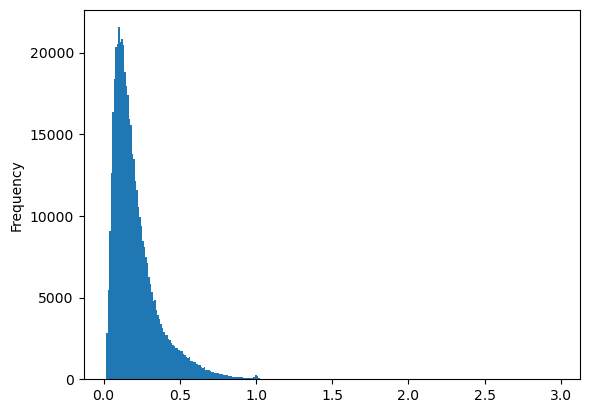

In [17]:
# 对一列数据画直方图以统计统计数据出现的频率
taxi["hour"].plot.hist(bins=300)
# X轴:代表数据的数值（即 hour，行程时长）
# Y轴:代表频数（有多少单行程是这个时长）
# 'bins=300':将数据范围切成300个片段

In [18]:
# 数据检查：
#taxi.info() # 检查每一列数据类型、每一列的空值个数、内存占用

#taxi.describe()# 对数据进行一次快速检查以发现异常值
# count: 有多少行数据（非空值的数量）
# mean: 平均值（比如平均每单多少钱）
# std: 标准差（反映数据波动大不大，标准差越大数据越离散）
# min: 最小值（比如最短的行程距离）
# 25%: 下四分位数（比它小的数据占 25%）
# 50%: 中位数（也叫 median，正好排在中间的那个数）
# 75%: 上四分位数（比它小的数据占 75%）
# max: 最大值（比如最贵的一单多少钱）

#taxi.isnull().sum()# 统计每一列里到底有多少个空值（NaN）
#taxi.sample() # 随机抽取一些行查看
#taxi.duplicated().sum() #查看有多少行是完全重复的 然后通常接一个taxi.drop_duplicates()将重复的删掉
#taxi.groupby('isweekend')['duration'].mean() # 比如：按“是否是周末”分组，看看平均行程时长是否符合常理
#taxi['pickup_dt'].dt.weekday.unique() # 输出没有NaN 说明没有空值
#taxi['pickup_dt'].dt.weekday.value_counts() # 查看每个星期几各有多少单

In [19]:
# 工作流一: split - apply - combine
# 分类集计信: groupby() + apply()
# 1.groupby():按照列值将一个表格分成不同的小表格
# 2.apply():针对每个DataFrame 进行运算
# 3.filter():按照返回True/False 序列对小组进行筛选
# 类似divide - and -conquer（归并）思想（分类+分类解决+集中/总结信息）

In [20]:
taxi.head()

,VendorID,pickup_dt,dropoff_dt,passenger_count,trip_distance,fare_amount,PULocationID,DOLocationID,duration,secs,hour,isweekend
0,1,2022-01-01 00:35:40,2022-01-01 00:53:29,2.0,3.80,14.5,142,236,0 days 00:17:49,1069,0.296944,True
1,1,2022-01-01 00:33:43,2022-01-01 00:42:07,1.0,2.10,8.0,236,42,0 days 00:08:24,504,0.140000,True
2,2,2022-01-01 00:53:21,2022-01-01 01:02:19,1.0,0.97,7.5,166,166,0 days 00:08:58,538,0.149444,True
3,2,2022-01-01 00:25:21,2022-01-01 00:35:23,1.0,1.09,8.0,114,68,0 days 00:10:02,602,0.167222,True
4,2,2022-01-01 00:36:48,2022-01-01 01:14:20,1.0,4.30,23.5,68,163,0 days 00:37:32,2252,0.625556,True


In [21]:
# 统计上车地点
len(taxi['PULocationID'].unique().tolist())
# taxi['PULocationID']：选中这一列
# .unique()：去重
# .tolist()：把刚才那个 NumPy 数组转换成 Python 原生的列表（List）
# len()：数一下这个列表里有多少个元素

242

In [22]:
# 统计从不同地方出发的出行平均时间长短

In [23]:
# 参考: https://pandas.pydata.org/docs/user_guide/groupby.html
def mean_traveltime_mins(x): # 输入'x':代表接收某一个特定分组的数据
    return x['secs'].mean() / 60 # x['secs'].mean()：算出这一堆订单的平均秒数

taxi.groupby(['PULocationID'])[['secs']].apply(mean_traveltime_mins) # '[['secs']]':告诉Pandas只将'secs'一列传进去，其他的不要传
# Pandas 按照 PULocationID（上车地点ID）把整个大表格切成了几百个小碎片
# Pandas 按照 mean_traveltime_mins(x) 计算每一个分组的数据 最后再将结果拼起来

PULocationID
1      11.962745
3      31.887500
4      13.223598
5      56.673333
6      32.205556
         ...    
261    15.918805
262     9.824728
263     9.377191
264    16.132953
265    53.586597
Length: 242, dtype: float64

In [24]:
# 如果一个地方的出行记录太少，则删除这个地区的记录
# 只选出出行次数大于100个的集计分组中的记录
def gb_count_filt(df, min_trips):
    if len(df) <= min_trips:
        return False # 人数太少，淘汰（False）
    return True      # 人数达标，保留（True）

taxi_bg = taxi.groupby(['PULocationID', 'isweekend']) 
taxi_bg = taxi_bg.filter(gb_count_filt, min_trips=100)
# 多列 groupby 是按 (列1, 列2) 组成的唯一组合键来划分数据。
# 只有当 PULocationID 和 isweekend 键值完全相同，数据才会被归入同一组（嵌套分组）。
print(taxi.shape)
print(taxi_bg.shape)

(486722, 12)
(481640, 12)


In [25]:
def mean_traveltime_df(df): # 输入'df':代表接收某一个特定分组的数据
    return pd.Series({"mean_tt": df['secs'].mean() / 60, # mean_tt：平均秒数 $\div 60$ (平均分钟数)
                      "median_tt": df['secs'].median() / 60, # median_tt：中位秒数 $\div 60$ (中位分钟数)
                      "count": len(df)}) # count：这一组的总订单数
# 'return pd.Series':将这三个结果打包成一个 Series 
time_summ = taxi_bg.groupby(['PULocationID', 'isweekend'])[['secs']].apply(mean_traveltime_df) # '[['secs']]':告诉Pandas只将'secs'一列传进去，其他的不要传
time_summ = time_summ.reset_index() # 将 MultiIndex（也就是作为分组依据的 PULocationID 和 isweekend）从行标签的位置“拉回来”，变成表格中的标准列
time_summ.head()

,PULocationID,isweekend,mean_tt,median_tt,count
0,4,False,13.505401,11.433333,287.0
1,4,True,12.694989,11.533333,153.0
2,7,False,14.948162,12.083333,263.0
3,7,True,12.476496,11.766667,117.0
4,12,False,17.690580,17.183333,115.0


In [26]:
# 工作流二：表格排序(sorting vs. ranking)
# 1 .sort_values():按照列的值排列
# 2 .rank():按照列的值排列返回名次信息
# 3 .sort_index():按照索引值的大小排列

In [27]:
# .sort_values():按照列的值排列（升序）
# 找出平均出行时间最长/最短的出发地区（但是起码数据中有100次出行）
time_summ.sort_values("mean_tt")

,PULocationID,isweekend,mean_tt,median_tt,count
133,263,True,8.682121,7.000000,2900.0
62,141,True,8.930612,7.366667,3081.0
116,237,False,9.081315,7.641667,19308.0
31,75,True,9.152439,7.233333,820.0
102,229,False,9.162169,7.750000,8211.0
...,...,...,...,...,...
26,70,False,21.732094,20.550000,1870.0
57,138,False,21.928408,20.816667,10988.0
54,132,True,28.985440,29.550000,8305.0
53,132,False,31.301362,31.550000,19755.0


In [28]:
# .sort_values():按照列的值排列（降序）
time_summ.sort_values("mean_tt", ascending=False) # 降序：改变参数：ascending=False

,PULocationID,isweekend,mean_tt,median_tt,count
136,265,False,56.150734,59.983333,477.0
53,132,False,31.301362,31.550000,19755.0
54,132,True,28.985440,29.550000,8305.0
57,138,False,21.928408,20.816667,10988.0
26,70,False,21.732094,20.550000,1870.0
...,...,...,...,...,...
102,229,False,9.162169,7.750000,8211.0
31,75,True,9.152439,7.233333,820.0
116,237,False,9.081315,7.641667,19308.0
62,141,True,8.930612,7.366667,3081.0


In [29]:
# rank():按照列的值排列返回名次信息
time_summ['tt_rank'] = time_summ['mean_tt'].rank(ascending=False)
time_summ

,PULocationID,isweekend,mean_tt,median_tt,count,tt_rank
0,4,False,13.505401,11.433333,287.0,34.0
1,4,True,12.694989,11.533333,153.0,45.0
2,7,False,14.948162,12.083333,263.0,23.0
3,7,True,12.476496,11.766667,117.0,51.0
4,12,False,17.690580,17.183333,115.0,10.0
...,...,...,...,...,...,...
132,263,False,9.599601,8.066667,9063.0,126.0
133,263,True,8.682121,7.000000,2900.0,137.0
134,264,False,15.927737,13.600000,3276.0,18.0
135,264,True,16.698850,15.158333,1188.0,14.0


In [30]:
# 再使用.sort_values()验证排名高低
time_summ = time_summ.sort_values(["mean_tt"], ascending=False)
time_summ

,PULocationID,isweekend,mean_tt,median_tt,count,tt_rank
136,265,False,56.150734,59.983333,477.0,1.0
53,132,False,31.301362,31.550000,19755.0,2.0
54,132,True,28.985440,29.550000,8305.0,3.0
57,138,False,21.928408,20.816667,10988.0,4.0
26,70,False,21.732094,20.550000,1870.0,5.0
...,...,...,...,...,...,...
102,229,False,9.162169,7.750000,8211.0,133.0
31,75,True,9.152439,7.233333,820.0,134.0
116,237,False,9.081315,7.641667,19308.0,135.0
62,141,True,8.930612,7.366667,3081.0,136.0


In [31]:
# 恢复原始索引顺序
time_summ.sort_index()

,PULocationID,isweekend,mean_tt,median_tt,count,tt_rank
0,4,False,13.505401,11.433333,287.0,34.0
1,4,True,12.694989,11.533333,153.0,45.0
2,7,False,14.948162,12.083333,263.0,23.0
3,7,True,12.476496,11.766667,117.0,51.0
4,12,False,17.690580,17.183333,115.0,10.0
...,...,...,...,...,...,...
132,263,False,9.599601,8.066667,9063.0,126.0
133,263,True,8.682121,7.000000,2900.0,137.0
134,264,False,15.927737,13.600000,3276.0,18.0
135,264,True,16.698850,15.158333,1188.0,14.0


In [32]:
#  工作流三:表格拼接(concate vs. join vs .merge)
# concat：按照行或列的方向简单拼接
# join：按照行的索引Index进行拼接
# merge：按照列的值为依据进行拼接

In [33]:
# 创建一个表格
workout_dict = {
  "calories": [420, 380, 390, 390],
  "duration": [50, 40, 45, 45],
  "type": ['run', 'walk', 'walk', 'run']
}

workout = pd.DataFrame(workout_dict)
workout

,calories,duration,type
0,420,50,run
1,380,40,walk
2,390,45,walk
3,390,45,run


In [34]:
workout_dict2 = {
  "calories": [420, 380],
  "duration": [50, 40],
  "type": ['bike', 'bike']
}

workout2 = pd.DataFrame(workout_dict2, index=["day5", "day6"])
workout2

,calories,duration,type
day5,420,50,bike
day6,380,40,bike


In [35]:
pd.concat([workout, workout2], axis=0) # 按照列拼接表格

,calories,duration,type
0,420,50,run
1,380,40,walk
2,390,45,walk
3,390,45,run
day5,420,50,bike
day6,380,40,bike


In [36]:
# 任务查询地理信息拼接到现有表格进行可视化 表格2:LocationID（更多地理区划信息） 表格3:ObjectID（地理图块信息）
# concat: 简单拼接不过2与表格3（得到表格4）
# join: 拼接表格1与表格2/3（根据索引）
# merge：拼接表格1与表格2/3（根据列名）

In [37]:
# 导入表格2：taxi_lookup行政区划表格
taxi_lookup = pd.read_csv("taxi_zone_lookup.csv")
taxi_lookup = taxi_lookup.loc[taxi_lookup.LocationID <= 263]
print(taxi_lookup.shape)
taxi_lookup.head()

(263, 4)


,LocationID,Borough,Zone,service_zone
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone


In [38]:
# 在你的终端或 Jupyter Notebook 单元格中运行
!pip install geopandas

In [39]:
# 导入表格3：taxi_zones地理信息表格
import geopandas as gpd
taxi_geo = gpd.read_file("data/taxi_zones/taxi_zones.shp") # 关键索引文件 .shx 丢失，请确保将整个 Shapefile 文件包完整地放在 taxi_zones 目录下
print(taxi_geo.shape)
taxi_geo.head()

(263, 7)


,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


In [40]:
# 根据列名检查是否可以横向左右拼接两个表格
(taxi_lookup.LocationID != taxi_geo.OBJECTID).sum()
# 如果结果为0：说明两个表格的 ID 完全一致且对齐，可以直接进行横向拼接，非常安全

0

In [41]:
taxi_geo = pd.concat([taxi_geo, taxi_lookup], axis=1) # 横向拼接
taxi_geo.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,LocationID,Borough,Zone,service_zone
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1,EWR,Newark Airport,EWR
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",2,Queens,Jamaica Bay,Boro Zone
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4,Manhattan,Alphabet City,Yellow Zone
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5,Staten Island,Arden Heights,Boro Zone


In [42]:
# 使用pd.join以索引为依据进行拼接
# 要先使用set_index来设置索引
# join two tables together
taxi_lookup = taxi_lookup.set_index("LocationID")
display(taxi_lookup.head())
time_summ = time_summ.set_index("PULocationID")
display(time_summ.head())

,Borough,Zone,service_zone
LocationID,,,
1,EWR,Newark Airport,EWR
2,Queens,Jamaica Bay,Boro Zone
3,Bronx,Allerton/Pelham Gardens,Boro Zone
4,Manhattan,Alphabet City,Yellow Zone
5,Staten Island,Arden Heights,Boro Zone


,isweekend,mean_tt,median_tt,count,tt_rank
PULocationID,,,,,
265,False,56.150734,59.983333,477.0,1.0
132,False,31.301362,31.550000,19755.0,2.0
132,True,28.985440,29.550000,8305.0,3.0
138,False,21.928408,20.816667,10988.0,4.0
70,False,21.732094,20.550000,1870.0,5.0


In [43]:
# 在设置好索引后，就可以用.join()来进行拼接
# 完成刚刚与 pd.concat()一样的拼接
time_summ_big2 = time_summ.join(taxi_lookup, how='left')
time_summ_big2 = time_summ_big2.reset_index()
time_summ_big2 = time_summ_big2.rename(columns={"index": "PULocationID"})
time_summ_big2.head()

,PULocationID,isweekend,mean_tt,median_tt,count,tt_rank,Borough,Zone,service_zone
0,265,False,56.150734,59.983333,477.0,1.0,NaN,NaN,NaN
1,132,False,31.301362,31.550000,19755.0,2.0,Queens,JFK Airport,Airports
2,132,True,28.985440,29.550000,8305.0,3.0,Queens,JFK Airport,Airports
3,138,False,21.928408,20.816667,10988.0,4.0,Queens,LaGuardia Airport,Airports
4,70,False,21.732094,20.550000,1870.0,5.0,Queens,East Elmhurst,Boro Zone


In [44]:
# .merge()是在指定的列上进行拼接
# 将地理信息与出行的表格进行拼接
time_summ = time_summ.reset_index()
time_summ_big1 = time_summ.merge(taxi_geo, left_on="PULocationID", right_on="OBJECTID", how='left')
time_summ_big1.head()

,PULocationID,isweekend,mean_tt,median_tt,count,tt_rank,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,LocationID,Borough,Zone,service_zone
0,265,False,56.150734,59.983333,477.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
1,132,False,31.301362,31.550000,19755.0,2.0,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,Queens,JFK Airport,Airports
2,132,True,28.985440,29.550000,8305.0,3.0,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((1032791.001 181085.006, 103283...",132.0,Queens,JFK Airport,Airports
3,138,False,21.928408,20.816667,10988.0,4.0,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((1019904.219 225677.983, 102031...",138.0,Queens,LaGuardia Airport,Airports
4,70,False,21.732094,20.550000,1870.0,5.0,70.0,0.063840,0.000195,East Elmhurst,70.0,Queens,"POLYGON ((1023276.361 216661.299, 1023320.055 ...",70.0,Queens,East Elmhurst,Boro Zone


In [52]:
# 在您的终端或 Jupyter Notebook 单元格中运行 (注意：在 Notebook 中要加 !)
!pip install contextily

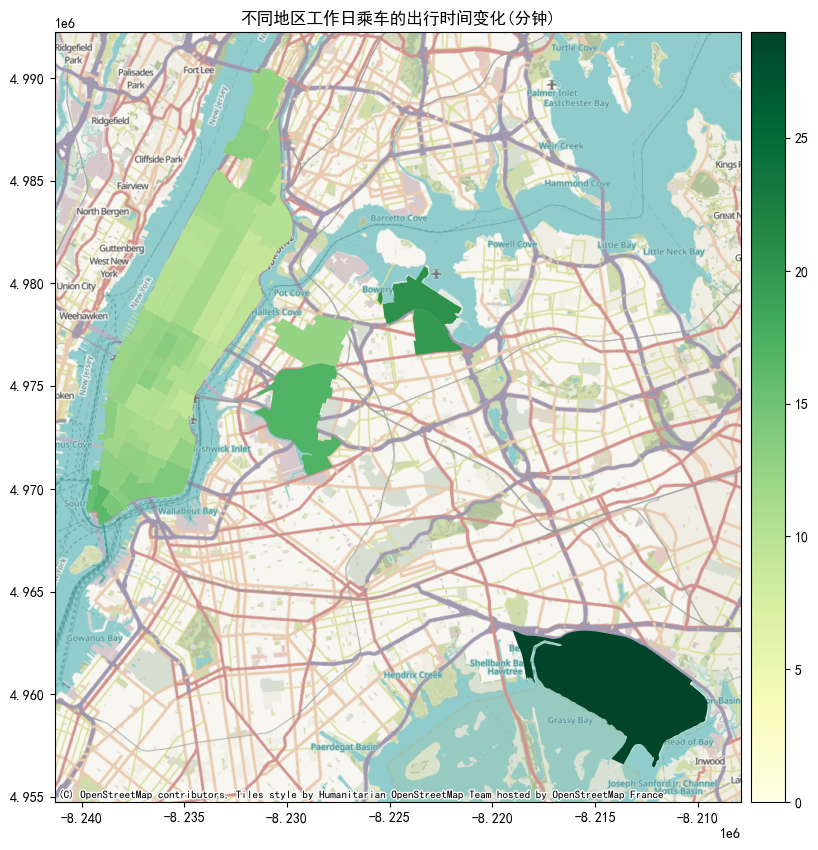

<Figure size 640x480 with 0 Axes>

In [51]:
# 可视化操作：
from matplotlib import cm
import matplotlib as mpl
import contextily as cx

time_summ_big1 = gpd.GeoDataFrame(time_summ_big1)
time_summ_big1 = time_summ_big1.to_crs(epsg=3857)
filt = (time_summ_big1.isweekend==True)
time_summ_big1_weekday = time_summ_big1.loc[filt, :]
time_summ_big1_weekend = time_summ_big1.loc[~filt, :]

# 我的环境可能不兼容 'Heiti TC' 即黑体？换成其他字体试试 mpl.rcParams['font.family'] = ['Heiti TC']
# 建立一个字体池 让计算机选一个能用的
mpl.rcParams['font.sans-serif'] = ['SimHei', 'Microsoft YaHei', 'Arial Unicode MS']
mpl.rcParams['font.family'] = 'sans-serif'
mpl.rcParams['axes.unicode_minus'] = False
from mpl_toolkits.axes_grid1 import make_axes_locatable

fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor=(1,1,1))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.colormaps['YlGn'] #不用旧写法：cmap = cm.get_cmap('YlGn')
norm = mpl.colors.Normalize(vmin=0, vmax=time_summ_big1_weekday['mean_tt'].max())
time_summ_big1_weekday.plot(column="mean_tt", ax=ax, cax=cax,
                            cmap=cmap, norm=norm, legend=True)
cx.add_basemap(ax)
ax.set_title(u"不同地区工作日乘车的出行时间变化(分钟)")
plt.figure(facecolor='white')
plt.show()

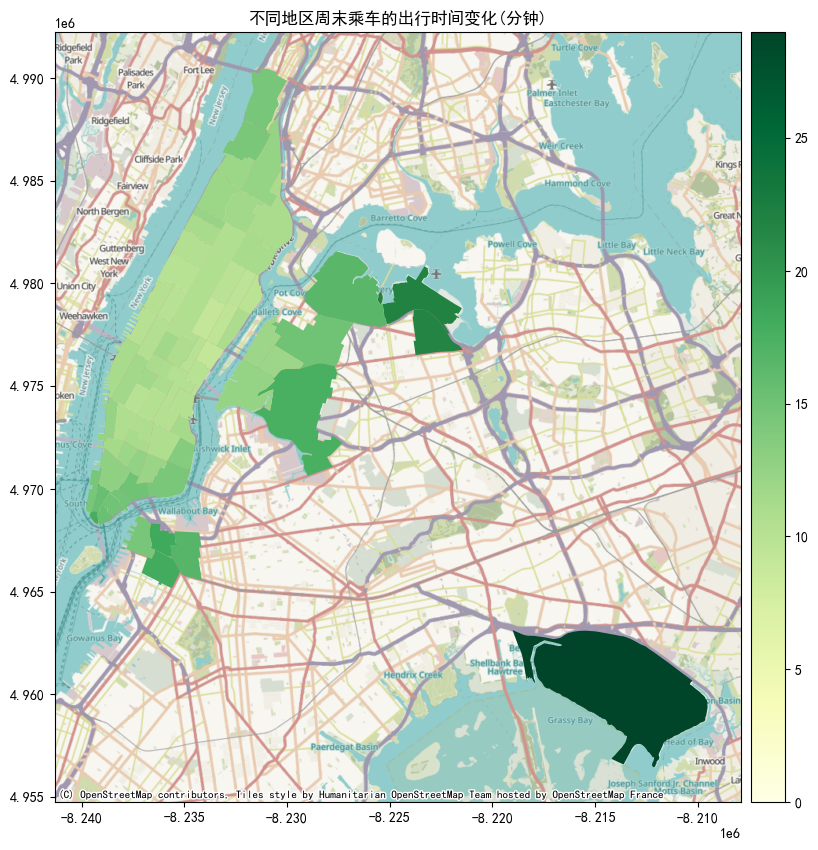

In [54]:
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor=(1,1,1))
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.1)
cmap = plt.colormaps['YlGn'] # 不使用旧写法： cmap = cm.get_cmap('YlGn')
norm = mpl.colors.Normalize(vmin=0, vmax=time_summ_big1_weekday['mean_tt'].max())
time_summ_big1_weekend.plot(column="mean_tt", ax=ax, cax=cax,
                            cmap=cmap, norm=norm, legend=True)
cx.add_basemap(ax)
ax.set_title(u"不同地区周末乘车的出行时间变化(分钟)")
# plt.figure(facecolor='yellow')
plt.show()

In [ ]:
# 有两个地区出行的时间都很长 因为这里是纽约的两个机场 很合理

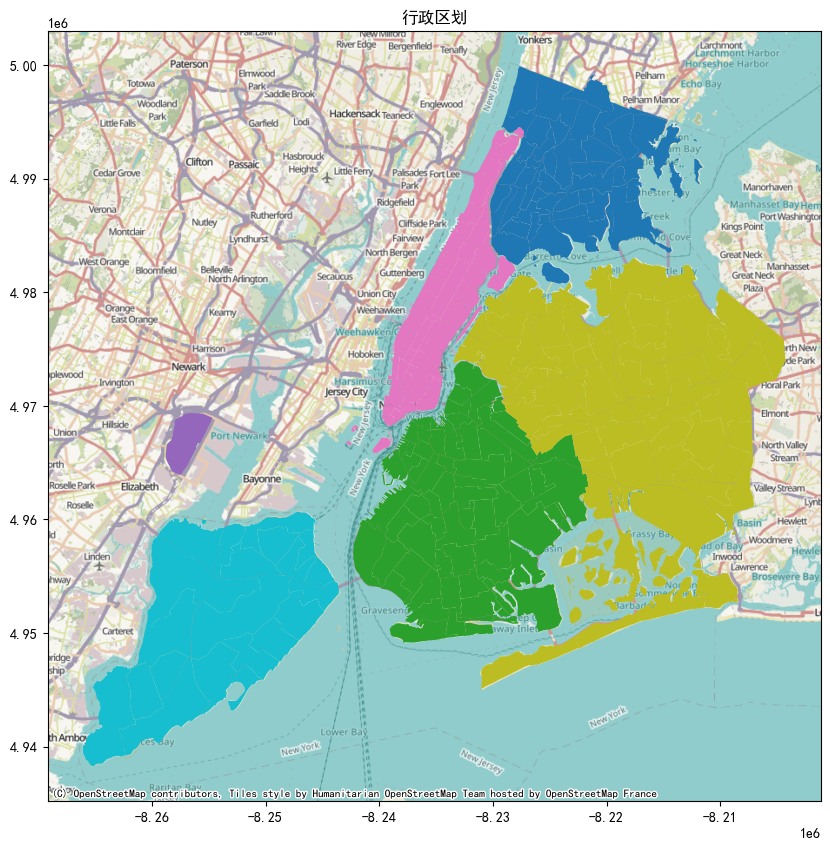

In [55]:
taxi_geo = taxi_geo.to_crs(epsg=3857)
# 任务：打印行政区
fig, ax = plt.subplots(1, 1, figsize=(10, 10), facecolor=(1,1,1))
taxi_geo.plot(column="borough", ax=ax)
cx.add_basemap(ax)
ax.set_title(u"行政区划")
plt.show()
# 下图是地理信息表格的行政区划图
# 黄色出租车运营是有范围的色，黄主要在曼哈顿运营；绿色在曼哈顿周边运营
# 上图对这个事实进行了验证 说明数据挖掘是有效果的
# 我们这里使用的是 left join 对于没有出行的地方 是不画出的

In [59]:
# 保存计算结果的失败的根本原因总结 (ValueError: Duplicate column names) ===
# 1. 结构冲突：GeoDataFrame 对列名要求极为严格，不允许任何重复。
# 2. 外部冲突：在 pd.concat 横向拼接时，左右两个表都包含了 'Borough', 'Zone', 'service_zone' 等同名列。
# 3. 内部冗余：在拼接前，taxi_geo 内部已存在 'LocationID' 等重复列，导致整体结构失效。
# 解决方案：必须在拼接前使用 .drop() 或 .rename() 消除所有重复的列名。

# 可能的保存方法：
# 存档操作 1：保存聚合后的数据 (用于 Plot 1/2)
time_summ_big1.to_file("time_summ_final.geojson", driver="GeoJSON")

# 存档操作 2：保存重投影后的行政区划数据 (用于 Plot 3)
taxi_geo.to_file("taxi_geo_3857.geojson", driver="GeoJSON") 

print("所有耗时结果已成功存档。")

In [ ]:
# 工作流四：长表格<->宽表格的互相转化

In [64]:
time_summ_big1.head()

,PULocationID,isweekend,mean_tt,median_tt,count,tt_rank,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,LocationID,Borough,Zone,service_zone
0,265,False,56.150734,59.983333,477.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN,NaN,NaN,NaN
1,132,False,31.301362,31.550000,19755.0,2.0,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((-8218165.268 4962845.736, -821...",132.0,Queens,JFK Airport,Airports
2,132,True,28.985440,29.550000,8305.0,3.0,132.0,0.245479,0.002038,JFK Airport,132.0,Queens,"MULTIPOLYGON (((-8218165.268 4962845.736, -821...",132.0,Queens,JFK Airport,Airports
3,138,False,21.928408,20.816667,10988.0,4.0,138.0,0.107467,0.000537,LaGuardia Airport,138.0,Queens,"MULTIPOLYGON (((-8223309.774 4980833.38, -8223...",138.0,Queens,LaGuardia Airport,Airports
4,70,False,21.732094,20.550000,1870.0,5.0,70.0,0.063840,0.000195,East Elmhurst,70.0,Queens,"POLYGON ((-8221960.047 4977193.366, -8221942.5...",70.0,Queens,East Elmhurst,Boro Zone


In [65]:
# 长表格转换为宽表格：使用 .pivot()
time_summ_wide = time_summ_big1.pivot(index="PULocationID", columns='isweekend', values='mean_tt')
time_summ_wide

isweekend,False,True
PULocationID,,
4,13.505401,12.694989
7,14.948162,12.476496
12,17.690580,NaN
13,14.561096,15.458473
24,12.314693,11.212865
...,...,...
261,15.594715,16.475833
262,9.847747,9.712276
263,9.599601,8.682121


In [63]:
print(time_summ_big1.shape)
print(time_summ_wide.shape)
# 宽表格的长度减少了一半

(137, 17)
(74, 2)


In [66]:
# 将宽表格变为长表格
# 对列的名字进行处理 使用 wide to long
time_summ_wide.columns = ['mean_tt_wd', 'mean_tt_we']
time_summ_wide = time_summ_wide.reset_index()
time_summ_wide.columns = ['PULocationID', 'mean_tt0', 'mean_tt1']
time_summ_wide

,PULocationID,mean_tt0,mean_tt1
0,4,13.505401,12.694989
1,7,14.948162,12.476496
2,12,17.690580,NaN
3,13,14.561096,15.458473
4,24,12.314693,11.212865
...,...,...,...
69,261,15.594715,16.475833
70,262,9.847747,9.712276
71,263,9.599601,8.682121
72,264,15.927737,16.698850


In [67]:
# wide to long
time_summ_long = pd.wide_to_long(time_summ_wide, stubnames="mean_tt", i="PULocationID", j="weekend")
time_summ_long = time_summ_long.reset_index()
time_summ_long

,PULocationID,weekend,mean_tt
0,4,0,13.505401
1,7,0,14.948162
2,12,0,17.690580
3,13,0,14.561096
4,24,0,12.314693
...,...,...,...
143,261,1,16.475833
144,262,1,9.712276
145,263,1,8.682121
146,264,1,16.698850
